## Image classification CNN


In [5]:
import numpy as np
import os
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from data import load_data


In [8]:
# load data
#os.chdir('E:\Babette\MasterThesis\Data')
train_data = np.load('train_data.npy') 

x_train, y_train = load_data(dp= 'train_data.npy')
x_val, y_val = load_data(dp='val_data.npy')


Shape of data tensor: (2000, 224, 224, 1)
Shape of label tensor: (2000,)
Shape of data tensor: (400, 224, 224, 1)
Shape of label tensor: (400,)


In [17]:
IMG_HEIGHT=224
IMG_WIDTH=224

In [18]:
len(train_data[0][0])



300

In [19]:

# X-Features & Y-Labels 
  
x_train = np.array([i[0] for i in train_data]).reshape(-1, IMG_HEIGHT,IMG_WIDTH, 1) 
y_train = np.array([i[1] for i in train_data])
y_train = np.array([i[0] for i in y_train])
x_val = np.array([i[0] for i in val_data]).reshape(-1,   IMG_HEIGHT, IMG_WIDTH, 1) 
y_val = np.array([i[1] for i in val_data] )
y_val = np.array([i[0] for i in y_val] )

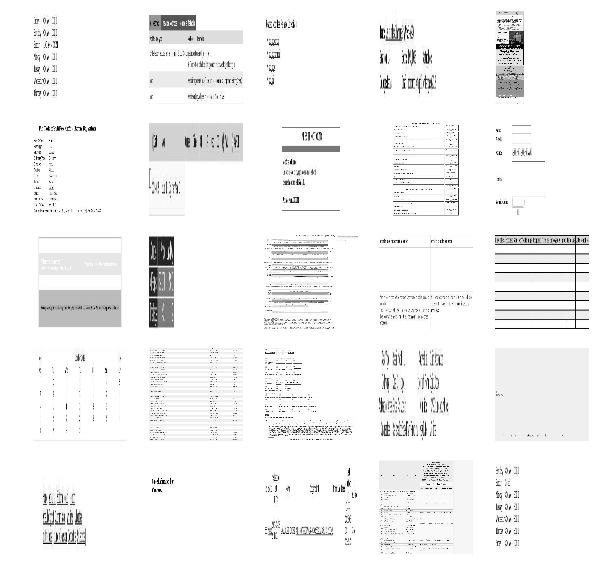

In [19]:

plt.figure(figsize=(10,10))
    
for n in range(25):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(train_data[n][0],cmap='gray', vmin = 0, vmax = 1)
  #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
  plt.axis('off')

In [20]:
print('Shape of data tensor:', x_train.shape)
print('Shape of label tensor:', y_train.shape)

print('Shape of data tensor:', x_val.shape)
print('Shape of label tensor:', y_val.shape)

Shape of data tensor: (2000, 224, 224, 1)
Shape of label tensor: (2000,)
Shape of data tensor: (400, 224, 224, 1)
Shape of label tensor: (400,)


In [29]:
def base_model():
    model = Sequential()

    #1st conv block
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224,1)))
    model.add(MaxPooling2D((2, 2)))

    #2nd conv block
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    #3rd 
    model.add(Conv2D(138, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    #dropout Layer
    model.add(Dropout(rate=0.2))
    
    # dense layers
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) 

    # output layer
    model.add(Dense(1, activation='sigmoid'))
    
    #print(model.summary())
    return model

In [30]:
#Initiate Model
#model= define_model()
#model= base_CNN()
model= base_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 138)       79626     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 138)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 138)      

In [31]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#Parameter
epochs=50
callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)]
batch_size=32

In [32]:
history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=(x_val, y_val),
        #validation_split=0.2,
        #verbose=1,  # Logs once per epoch.
        batch_size=batch_size)

Epoch 1/50
63/63 [==============================] - 112s 2s/step - loss: 2.6168 - acc: 0.5835 - val_loss: 0.6321 - val_acc: 0.6975
Epoch 2/50
63/63 [==============================] - 118s 2s/step - loss: 0.6172 - acc: 0.6710 - val_loss: 0.6146 - val_acc: 0.6500
Epoch 3/50
63/63 [==============================] - 147s 2s/step - loss: 0.5674 - acc: 0.7065 - val_loss: 0.5909 - val_acc: 0.7375
Epoch 4/50
63/63 [==============================] - 119s 2s/step - loss: 0.5303 - acc: 0.7265 - val_loss: 0.6213 - val_acc: 0.7050
Epoch 5/50
63/63 [==============================] - 116s 2s/step - loss: 0.4845 - acc: 0.7500 - val_loss: 0.6365 - val_acc: 0.7425
Epoch 6/50
63/63 [==============================] - 113s 2s/step - loss: 0.4294 - acc: 0.7830 - val_loss: 0.6875 - val_acc: 0.7375
Epoch 7/50
63/63 [==============================] - 116s 2s/step - loss: 0.4069 - acc: 0.8160 - val_loss: 0.6590 - val_acc: 0.7375
Epoch 8/50
63/63 [==============================] - 115s 2s/step - loss: 0.3580 - a

In [37]:
#safe model
model.save('mini_model_subset2.h5')

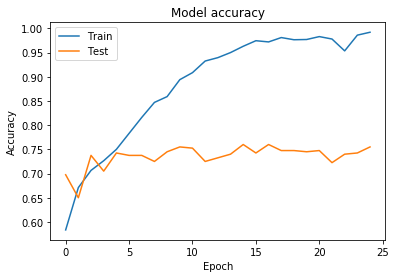

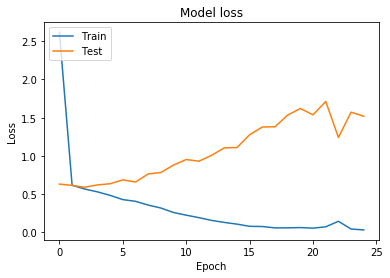

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
#load test data
x_test, y_test = load_data(dp= 'test_data.npy')


Shape of data tensor: (600, 224, 224, 1)
Shape of label tensor: (600,)


In [35]:
#Predictions on test set

y_pred = np.around(model.predict(x_test)).astype(int)


In [36]:
report = skm.classification_report(y_test, y_pred, )
print(report) 


              precision    recall  f1-score   support

           0       0.74      0.71      0.72       300
           1       0.72      0.75      0.74       300

   micro avg       0.73      0.73      0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



In [38]:
#confusion Matrix
cm = skm.confusion_matrix(y_test, y_pred)
print(cm)


[[213  87]
 [ 75 225]]


In [39]:
print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=1))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=1))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=1))



print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=0))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=0))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0))


F1 score: 
0.7352941176470588
Precision: 
0.7211538461538461
Recall:
0.75
F1 score: 
0.7244897959183674
Precision: 
0.7395833333333334
Recall:
0.71


In [40]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.73

In [ ]:
# load model trained before
#model.load_weights('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')